In [5]:
!ls ../../dss15_socar_fraud_detection/data

Daren_X_test.csv
Daren_X_train.csv
Daren_y_test.csv
Daren_y_train.csv
Hanas_base.csv
X_.csv
X_m.csv
dt_X_mix_train.csv
dt_X_test.csv
dt_X_train.csv
dt_y_mix_train.csv
dt_y_test.csv
dt_y_train.csv
ee803a7da00d9366.docx
insurance_fraud_detect_data copy.csv
insurance_fraud_detect_data.csv
insurance_fraud_detect_data_0.7_0.3.csv
insurance_fraud_detect_data_0.8_0.2.csv
y_.csv
y_m.csv
쏘카데이터설명.txt


In [6]:
# 1.  base 데이터 불러오기

import pandas as pd

pd.set_option('display.max_columns',500)
pd.options.display.float_format = '{:.5f}'.format
data_path = ('../../dss15_socar_fraud_detection/data/')
total=pd.read_csv(data_path+'Hanas_base.csv')
train=total[total['test_set']==0].reset_index(drop=True).drop('test_set',axis=1)
test=total[total['test_set']==1].reset_index(drop=True).drop('test_set',axis=1)

#feature, label 나누기
X_train=train.iloc[:,1:]
y_train=train.iloc[:,0]
X_test=test.iloc[:,1:]
y_test=test.iloc[:,0]

# fraud data 갯수 확인

train_yf=train[train['fraud_YN']==1]
train_nf=train[train['fraud_YN']==0]
test_yf=test[test['fraud_YN']==1]

print(' total : ', total.shape,'\n',
      'columns : ',train.shape[1],'\n',
      'train : ',train.shape,'\n',
      'test : ',test.shape,'\n',
      'train_fraud : ', len(y_train[y_train==1]),'\n',
      'test_fraud : ', len(y_test[y_test==1]))

 total :  (16000, 25) 
 columns :  24 
 train :  (12879, 24) 
 test :  (3121, 24) 
 train_fraud :  34 
 test_fraud :  7


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ls = list(range(2,25))

num = []
score = []

for i in ls:
    k = i
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit_predict(X_train)
    si_sc = silhouette_score(X_train, kmeans.labels_)
    num.append(i)
    score.append(si_sc)
    
dic = {'num':num, 'score':score}
df = pd.DataFrame(dic)
df

,num,score
0,2,0.92339
1,3,0.87310
2,4,0.80453
3,5,0.79134
4,6,0.73955
5,7,0.67378
6,8,0.68021
7,9,0.68563
8,10,0.64616
9,11,0.64628


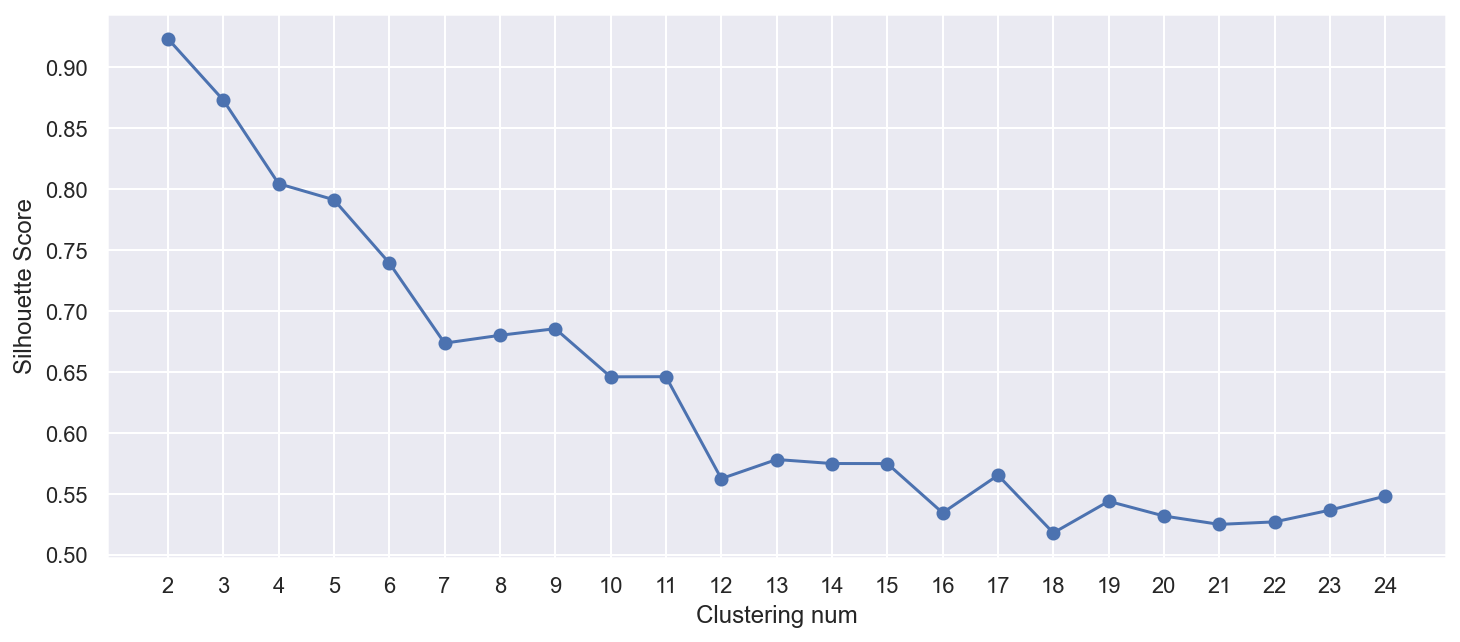

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,5))
plt.plot(df['num'], df['score'], marker='o')
plt.xticks(df['num'])
plt.xlabel('Clustering num')
plt.ylabel('Silhouette Score')

plt.show();
#변화가 완만해지는 '앨보' 12 보다 살짝 높은 13으로 결정

# normal- fraud 나눠서 cluster

In [9]:
train_yf = train[train['fraud_YN']==1]
train_nf = train[train['fraud_YN']==0]

test_yf = test[test['fraud_YN']==1]
test_nf = test[test['fraud_YN']==0]

train_yf.shape, train_nf.shape,test_yf.shape

((34, 24), (12845, 24), (7, 24))

## 궁금하니까 fraud 부터

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ls = list(range(2,25))

num = []
score = []

for i in ls:
    k = i
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit_predict(train_yf)
    si_sc = silhouette_score(train_yf, kmeans.labels_)
    num.append(i)
    score.append(si_sc)
    
dic = {'num':num, 'score':score}
df = pd.DataFrame(dic)
df

,num,score
0,2,0.85359
1,3,0.77341
2,4,0.72770
3,5,0.70771
4,6,0.57954
5,7,0.49094
6,8,0.46068
7,9,0.50896
8,10,0.48781
9,11,0.47416


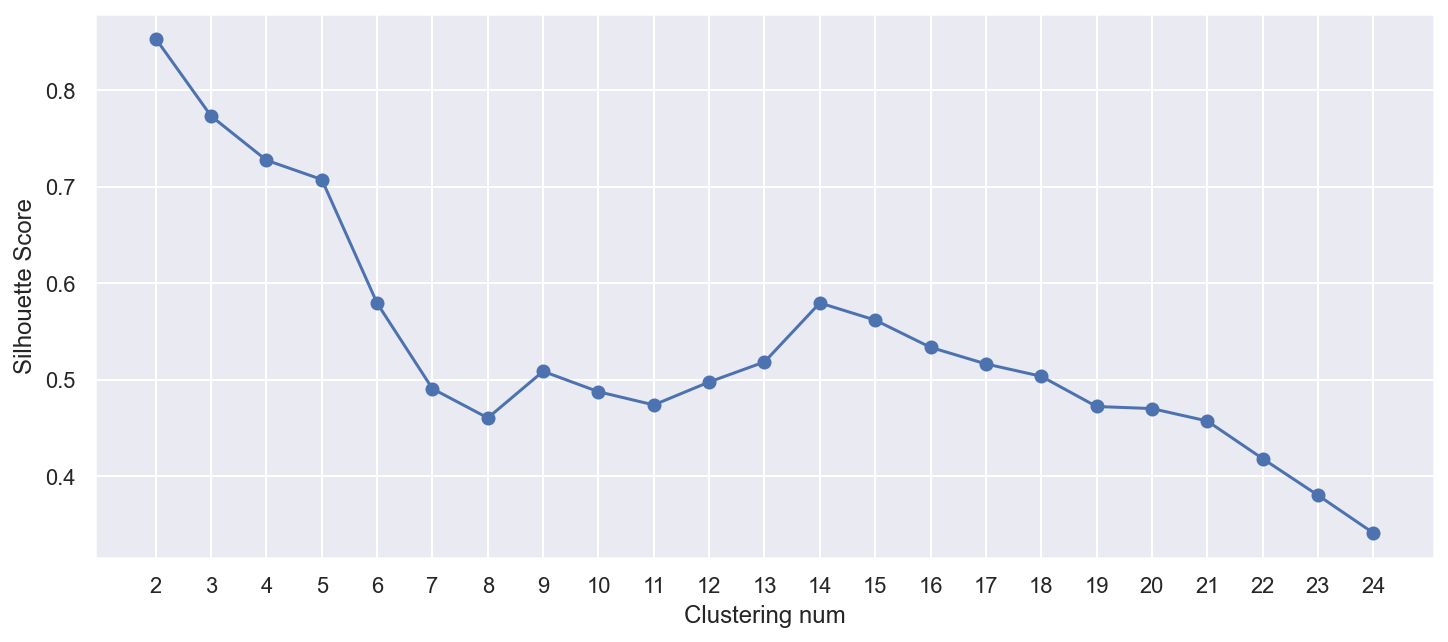

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,5))
plt.plot(df['num'], df['score'], marker='o')
plt.xticks(df['num'])
plt.xlabel('Clustering num')
plt.ylabel('Silhouette Score')

plt.show();

#

## normal turn

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ls = list(range(2,25))

num = []
score = []

for i in ls:
    k = i
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit_predict(train_nf)
    si_sc = silhouette_score(train_nf, kmeans.labels_)
    num.append(i)
    score.append(si_sc)
    
dic = {'num':num, 'score':score}
df = pd.DataFrame(dic)
df

,num,score
0,2,0.92383
1,3,0.87300
2,4,0.80445
3,5,0.79144
4,6,0.74338
5,7,0.68204
6,8,0.68208
7,9,0.69090
8,10,0.64637
9,11,0.63512


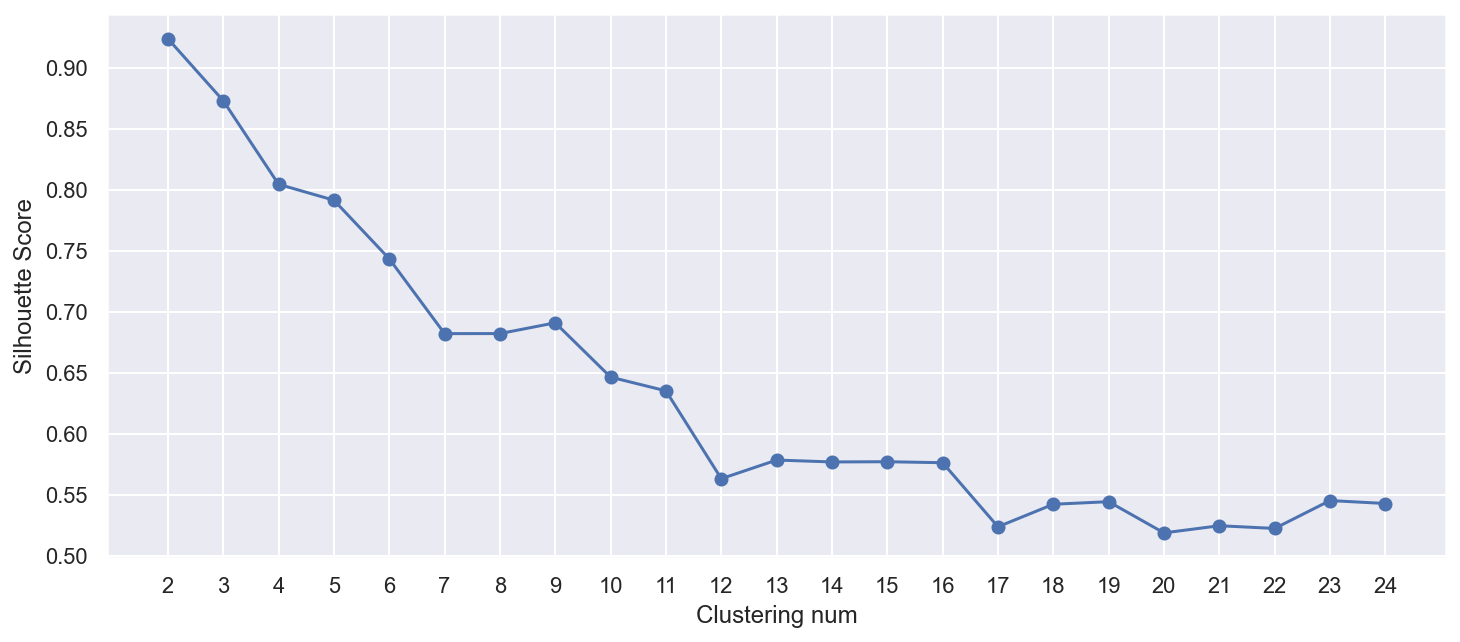

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,5))
plt.plot(df['num'], df['score'], marker='o')
plt.xticks(df['num'])
plt.xlabel('Clustering num')
plt.ylabel('Silhouette Score')

plt.show();


#전체 데이터랑 똑같이 나왔음

In [14]:
#군집 라벨링 추가해서 샘플링을 해보자

from sklearn.cluster import KMeans

# Train

#fraud
k = 14
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(train_yf)
train_yf['cluster'] = y_pred+100

#normal
k_ = 13
kmeans_ = KMeans(n_clusters=k_)
y_pred_ = kmeans_.fit_predict(train_nf)
train_nf['cluster'] = y_pred_


# Test

#fraud

y_pred = kmeans.predict(test_yf)
test_yf['cluster'] = y_pred+100

#normal

y_pred_ = kmeans_.predict(test_nf)
test_nf['cluster'] = y_pred_

/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [16]:
#fraud-normal 합치기

train_ = pd.concat([train_yf, train_nf], axis=0)
train_.reset_index(drop=True,inplace=True)


X_train_ = train_.drop('cluster',axis=1)
y_train_ = train_['cluster']
X_train__ = train_.drop('fraud_YN',axis=1)
y_train__ = train_['fraud_YN']

test_ = pd.concat([test_yf, test_nf], axis=0)
test_.reset_index(drop=True,inplace=True)


X_test_ = test_.drop('cluster',axis=1)
y_test_ = test_['cluster']
X_test__ = test_.drop('fraud_YN',axis=1)
y_test__ = test_['fraud_YN']


In [17]:
y_train_.value_counts()

9      7937
8      1880
0      1217
4       817
12      479
3       255
7       125
1        54
11       40
10       19
5        13
2         7
111       7
100       4
110       4
106       3
105       3
112       3
108       2
113       2
6         2
103       1
101       1
109       1
102       1
104       1
107       1
Name: cluster, dtype: int64

## 모델링

In [ ]:
# 베이스 code

In [37]:
# 사용할 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC



dt = DecisionTreeClassifier(max_depth=7, random_state=13)
lr = LogisticRegression(random_state=13, solver='liblinear')
# lr = LogisticRegression(random_state=13, multi_class='multinomial',solver='lbfgs',C=10)
rf = RandomForestClassifier(random_state=13, n_estimators=100, max_depth=6)
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=13), n_estimators=100,
    max_samples=100, bootstrap=False, n_jobs=-1
)
svc = SVC(random_state=19,kernel = 'linear')
lgbm = LGBMClassifier(random_state=13,n_estimators=100, num_leaves=10, n_jobs = -1, boost_from_average=False)

# models = [dt,lr,rf,bag_clf,svc,lgbm]
models = [dt,lr,rf]
# model_names = ['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier','BaggingClassifier','SVC','LGBMClassifier','base']
model_names = ['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier','base']

In [38]:
#결과 출력 함수
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix)


def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred,labels=([0, 2]))
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    
    return acc, pre, re, f1, auc



def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    
    print('=> confusion matrix')
    print(confusion)
    print('==========')
    
    print('Accuracy :{0:.4f} , Precision: {1:.4f}'.format(acc,pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

#모델과 데이터를 주면 성능을 출력하는 함수
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

#다수의 모델의 성능을 정리해서 DataFrame으로 반환
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model,X_train, y_train, X_test, y_test))
        print('success enter {}'.format(model))
    
    # base라인(모두가 정상 데이터)컬럼 추가
    base_pred=np.zeros((len(y_test),1))
    tmp.append(get_clf_eval(y_test, base_pred))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [39]:
#class 3개용 결과 출력 함수
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix)


def get_clf_eval_3(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred,pos_label=2,labels=(0,1,2),average='micro')
    re = recall_score(y_test, pred,pos_label=2,labels=(0,1,2),average='micro')
    f1 = f1_score(y_test, pred,pos_label=2,labels=(0,1,2),average='micro')
#     auc = roc_auc_score(y_test, pred)
    
    
    return acc, pre, re, f1



def print_clf_eval_3(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1 = get_clf_eval_3(y_test, pred)
    
    
    print('=> confusion matrix')
    print(confusion)


#모델과 데이터를 주면 성능을 출력하는 함수
def get_result_3(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval_3(y_test, pred)

#다수의 모델의 성능을 정리해서 DataFrame으로 반환
def get_result_pd_3(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1']
    tmp = []

    for model in models:
        tmp.append(get_result_3(model,X_train, y_train, X_test, y_test))
        print('success enter {}'.format(model))
    
    # base라인(모두가 정상 데이터)컬럼 추가
    base_pred=np.zeros((len(y_test),1))
    tmp.append(get_clf_eval_3(y_test, base_pred))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

# SCUT base line : 단순 SMOTE

In [ ]:
y_train 

In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=13, k_neighbors=10,sampling_strategy=1)
X_over, y_over = smote.fit_resample(X_train, y_train)

y_over.value_counts()

In [ ]:
results = get_result_pd(models, model_names, X_over, y_over, X_test, y_test)
print('success get_result!')
print(results)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=7, random_state=13)

dt_clf.fit(X_over, y_over)
dt_pred= dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression

lo_clf = LogisticRegression(random_state=13, solver='liblinear')


lo_clf.fit(X_over, y_over)
lo_pred= lo_clf.predict(X_test)

print_clf_eval(y_test, lo_pred)

# fraud 두개로만 나누기

In [18]:
#군집 라벨링 추가해서 샘플링을 해보자

from sklearn.cluster import KMeans


train_yf = train[train['fraud_YN'] == 1]
train_nf = train[train['fraud_YN'] == 0]

test_yf = test[test['fraud_YN'] == 1]
test_nf = test[test['fraud_YN'] == 0]



# Train

#fraud
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(train_yf)
train_yf['cluster'] = y_pred

#normal
train_nf['cluster'] = 3


# Test

#fraud
 
y_pred = kmeans.predict(test_yf)
test_yf['cluster'] = y_pred

#normal

test_nf['cluster'] = 3

/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [19]:
#fraud-normal 합치기

train_ = pd.concat([train_yf, train_nf], axis=0)
train_.reset_index(drop=True,inplace=True)


X_train_ = train_.drop(['fraud_YN','cluster'],axis=1)
y_train_ = train_['cluster']
X_train__ = train_.drop('fraud_YN',axis=1)
y_train__ = train_['fraud_YN']

test_ = pd.concat([test_yf, test_nf], axis=0)
test_.reset_index(drop=True,inplace=True)


X_test_ = test_.drop(['fraud_YN','cluster'],axis=1)
y_test_ = test_['cluster']
X_test__ = test_.drop('fraud_YN',axis=1)
y_test__ = test_['fraud_YN']


In [20]:
y_train_.value_counts()

3    12845
1       31
0        2
2        1
Name: cluster, dtype: int64

In [21]:
out_ls = list(y_train_[y_train_== 1].index)
out_ls

[0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 33]

In [23]:
X_train_.loc[out_ls]
#fraud 전체를 *2하고 오버샘플링 해야겠다.

In [24]:
#fraud 34개 -> 68개 만들기
#1. train_yf를 클론한 데이터프레임을 만들고
#2. train_yf에 합치기

train_yf = train[train['fraud_YN']==1]
train_nf = train[train['fraud_YN']==0]

test_yf = test[test['fraud_YN']==1]
test_nf = test[test['fraud_YN']==0]

#1. 
clone_train_yf = train_yf.copy()

#2. 
train_yf = pd.concat([train_yf, clone_train_yf,clone_train_yf,clone_train_yf], axis=0)
train_yf.reset_index(drop=True, inplace=True)
train_yf.shape  #(102, 24)



(136, 24)

In [25]:
# fraud 군집 2개 하기


#군집 라벨링 추가해서 샘플링을 해보자

from sklearn.cluster import KMeans


# Train

#fraud
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(train_yf)
train_yf['cluster'] = y_pred

#normal
train_nf['cluster'] = 3


# Test

#fraud
 
y_pred = kmeans.predict(test_yf)
test_yf['cluster'] = y_pred

#normal

test_nf['cluster'] = 3

/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [26]:
train_yf['cluster'].value_counts()

0    124
2      8
1      4
Name: cluster, dtype: int64

In [27]:
#오버샘플링을 위한 feature, label 나눠주기
X_train_yf = train_yf.drop(['fraud_YN','cluster'], axis=1)
y_train_yf = train_yf['cluster']

In [28]:
#fraud만 오버샘플링

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=13, k_neighbors=3,sampling_strategy={0:124,1:32,2:32})
X_over_yf, y_over_yf = smote.fit_resample(X_train_yf, y_train_yf)

y_over_yf.value_counts()
#갹!

0    124
2     32
1     32
Name: cluster, dtype: int64

In [29]:
#오버샘플링된 yf 다시 트레인에 합치기

#yf feature + label
X_over_yf['cluster'] = y_over_yf
over_train_yf = X_over_yf.copy()
train_nf_ = train_nf.drop('fraud_YN', axis=1)

#nf + yf

oy_train_ = pd.concat([over_train_yf, train_nf_], axis=0)
oy_train_.reset_index(drop=True,inplace=True)
oy_train_ #train_.shape = (12879, 25)  62개 늘어남

test_ = pd.concat([test_yf, test_nf], axis=0)
test_.reset_index(drop=True, inplace=True)



#train - test split

X_oy_train = oy_train_.drop('cluster', axis=1)
y_oy_train = oy_train_['cluster']

X_test_ = test_.drop(['fraud_YN','cluster'], axis=1)
y_test_ = test_['cluster']

In [ ]:
#오버샘플링 갯수 정하기

#1 갯수
12645/2*2/3  #4215

#2 갯수
12645/2*1/2  #3161

In [30]:
# normal - fraud 오버샘플링


from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=13, k_neighbors=9,sampling_strategy={0:12845,1:5000,2:5000,3:12845})
X_over_yf, y_over_yf = smote.fit_resample(X_oy_train, y_oy_train)

y_over_yf.value_counts()
#갹!

3    12845
0    12845
2     5000
1     5000
Name: cluster, dtype: int64

In [31]:
#bother line sampling

from imblearn.over_sampling import BorderlineSMOTE

# imblearn.over_sampling.BorderlineSMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None, m_neighbors=10, kind='borderline-1')[source]



bother_smote = BorderlineSMOTE(random_state=13, k_neighbors=9,sampling_strategy={0:12845,1:5000,2:5000,3:12845})
X_b_over_yf, y_b_over_yf = bother_smote.fit_resample(X_oy_train, y_oy_train)

y_b_over_yf.value_counts()



#다수 클래스 경계에 없는 거는 전혀 오버샘플링이 안됨 .

3    12845
0    12845
2       32
1       32
Name: cluster, dtype: int64

In [40]:
results = get_result_pd_3(models, model_names, X_b_over_yf, y_b_over_yf, X_test_, y_test_)
print('success get_result!')
print(results)

/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


success enter DecisionTreeClassifier(max_depth=7, random_state=13)


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1
DecisionTreeClassifier   0.84108    0.00406 0.28571 0.00800
LogisticRegression       0.38321    0.00208 0.57143 0.00414
RandomForestClassifier   0.86383    0.00000 0.00000 0.00000
base                     0.00224    0.00224 1.00000 0.00448


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [41]:
#모델 돌려보기

results = get_result_pd_3(models, model_names, X_over_yf, y_over_yf, X_test_, y_test_)
print('success get_result!')
print(results)

/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


success enter DecisionTreeClassifier(max_depth=7, random_state=13)


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1
DecisionTreeClassifier   0.80904    0.00504 0.42857 0.00997
LogisticRegression       0.30855    0.00231 0.71429 0.00461
RandomForestClassifier   0.87120    0.00000 0.00000 0.00000
base                     0.00224    0.00224 1.00000 0.00448


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [42]:
from sklearn.linear_model import LogisticRegression

lo_clf = LogisticRegression(random_state=13, solver='liblinear')


lo_clf.fit(X_over_yf, y_over_yf)
lo_pred= lo_clf.predict(X_test_)

print_clf_eval_3(y_test_, lo_pred)

=> confusion matrix
[[   5    0    0    2]
 [   0    0    0    0]
 [   0    0    0    0]
 [1940  114  102  958]]


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=7, random_state=13)

dt_clf.fit(X_over_yf, y_over_yf)
dt_pred= dt_clf.predict(X_train_)

print_clf_eval_3(y_train_, dt_pred)

=> confusion matrix
[[    0     0     2     0]
 [   25     0     0     6]
 [    0     1     0     0]
 [ 1995     0     6 10844]]


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [44]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=7, random_state=13)

dt_clf.fit(X_over_yf, y_over_yf)
dt_pred= dt_clf.predict(X_test_)

print_clf_eval_3(y_test_, dt_pred)

=> confusion matrix
[[   3    0    0    4]
 [   0    0    0    0]
 [   0    0    0    0]
 [ 588    1    3 2522]]


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# from sklearn.svm import SVC
# svc = SVC(kernel = 'linear',C=100)
# svc.fit(X_over_yf, y_over_yf)
# svc_pred= svc.predict(X_test_)

# print_clf_eval(y_test_, svc_pred)

# 언더두 같이 해주자

In [46]:

#샘플링

# pipeline을 활용한 오버샘플링 + 언더샘플링 (smote + NearMiss)

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE




# define pipeline
over = BorderlineSMOTE(random_state=13, k_neighbors=16,sampling_strategy={0:12845,1:5000,2:5000,3:13000})
under = TomekLinks()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mix, y_train_mix  = pipeline.fit_resample(X_oy_train, y_oy_train)
print('success entering pipeline!')


    

results = get_result_pd_3(models, model_names, X_train_mix, y_train_mix, X_test_, y_test_)
print('success get_result!')
print(results)


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (13000) in class 3 will be larger than the number of samples in the majority class (class #3 -> 12845)
  n_samples_majority,


success entering pipeline!
success enter DecisionTreeClassifier(max_depth=7, random_state=13)


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


success enter LogisticRegression(random_state=13, solver='liblinear')
success enter RandomForestClassifier(max_depth=6, random_state=13)
success get_result!
                        accuracy  precision  recall      f1
DecisionTreeClassifier   0.71227    0.00112 0.14286 0.00222
LogisticRegression       0.35437    0.00248 0.71429 0.00494
RandomForestClassifier   0.87344    0.00000 0.00000 0.00000
base                     0.00224    0.00224 1.00000 0.00448


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [47]:
from sklearn.linear_model import LogisticRegression

lo_clf = LogisticRegression(random_state=13, solver='liblinear')


lo_clf.fit(X_train_mix, y_train_mix)
lo_pred= lo_clf.predict(X_test_)

print_clf_eval_3(y_test_, lo_pred)

=> confusion matrix
[[   5    2]
 [2013 1101]]


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=6, random_state=13)

dt_clf.fit(X_train_mix, y_train_mix)
dt_pred= dt_clf.predict(X_test_)

print_clf_eval_3(y_test_, dt_pred)

=> confusion matrix
[[   2    0    5]
 [   0    0    0]
 [1112    7 1995]]


/Users/janghan-a/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
